# Basic Concept - Gradient Descent

As a simple introduction to the mathematical foundation of machine learning we view the task of fitting a linear regression. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Here, we train our model to fit data points that are randomly scattered along a straight line.

In [2]:
train_x = np.random.uniform(0, 10, size=50)
train_y = [np.random.normal(val + 5, 0.5) for val in train_x]

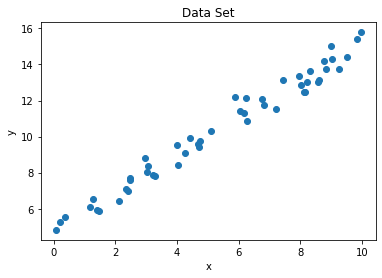

In [3]:
plt.scatter(train_x, train_y)
plt.title("Data Set")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

For this problem we use a simple regression model:

>$y_{pred} = w x + b$

The task is to find the parameters $w$ and $b$, that fit best the data points. For gradient descent we need a loss function to measure the difference between the predicted and ground-truth value. In this example we choose a quadratic loss (eucledian metric).

>$loss = E =\frac{1}{2} |y_{pred}-y|^2$

The derivative of the loss function with respect to the parameter, gives the change of the loss function when the parameter is varied. To minimize the loss function the parameter is adjusted in the oposite direction of the largest change. Therefore, we want to take steps in the opposite direction of the gradient (gradient descent). To find the best minimum, we need to make small adjustments to iteratively converge to the minimum position. The learning rate ($\eta$) defines the step size for each update. Evaluating the derivative gives us the update algorithm for our problem ($y_{pred}$ denotes the predicted value and $y$ the real value):

>$w_{new} = w_{old} - \eta \frac{dE}{dw}$

>$\frac{dE}{dw} = \frac{d}{dw} (\frac{1}{2}|y_{pred}-y|^2) = \frac{d}{dw} (\frac{1}{2}|w x + b - y|^2) = (w x + b - y) x = (y_{pred}-y) x$

>$w_{new} = w_{old} - \eta (y_{pred}-y)x$

>$b_{new} = b_{old} - \eta \frac{dE}{db} = b_{old} - \eta (y_{pred} - y)$

For our updates we consider two steps. 1) forward pass: calculate $y_{pred}$ for the input sample. 2) backward pass: calculate the gradient for each parameter and apply the update. These two steps are performed iteratively until we reach convergence.

The correct selection of the learning rate is important for the success of this algorithm. The free parameters are initialized randomly.

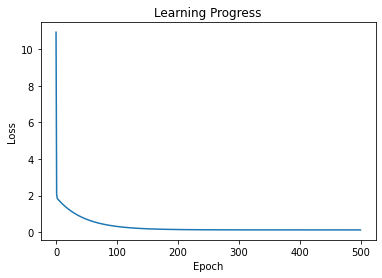

In [4]:
w = np.random.rand()
b = np.random.rand()
lr = 0.001

learning_progress = []
for epoch in range(500):
  losses = []
  for i in range(len(train_x)):
    x = train_x[i]
    y = train_y[i]
    y_pred = x * w + b

    loss = 0.5 * (y_pred - y)**2

    w = w - lr * (y_pred - y) * x
    b = b - lr * (y_pred - y)

    losses.append(loss)
  learning_progress.append(np.mean(losses))
  
plt.title("Learning Progress")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(len(learning_progress)), learning_progress)
plt.show()

To validate our training success we draw the resulting prediction.

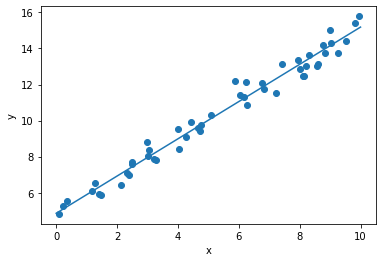

In [5]:
plt.scatter(train_x, train_y)

x_test = range(11)
y_prediction = [w*x+b for x in x_test]

plt.plot(x_test, y_prediction)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Classification in 2D

The previous example can easily be extended to 2D. For this example we use samples from two different gaussian distributions and train our model to find a separation between them.

In [6]:
from sklearn.utils import shuffle

In [7]:
def gaussian_2d(x_mean, y_mean, mu):
  x = np.random.normal(x_mean, mu)
  y = np.random.normal(y_mean, mu)
  return (x, y)

In [8]:
# create the two sample distributions
data_points_1 = np.array([gaussian_2d(1, 1, 0.5) for _ in range(50)])
data_points_2 = np.array([gaussian_2d(-1, -1, 0.5) for _ in range(50)])

# create training data and shuffle the dataset
train_x = np.concatenate([data_points_1, data_points_2])
train_y = np.array([0] * 50 + [1] * 50)
train_x, train_y = shuffle(train_x, train_y)

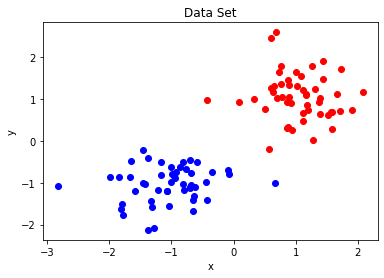

In [9]:
plt.scatter(data_points_1[:, 0], data_points_1[:, 1], color="red")
plt.scatter(data_points_2[:, 0], data_points_2[:, 1], color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Set")
plt.show()

To seperate the two distributions we can use the algorithm from the previous example and replace the multiplications with dot products. The scalar w is replaced with a 2x1 matrix. Since we are dealing now with vectors the derivative is replaced with the gradient operator. Again we update in the opposite direction of the gradient.

>$W_{new} = W_{old} - \eta \nabla_WE = w_{old} - \eta (y_{pred}-y) \vec{x}$




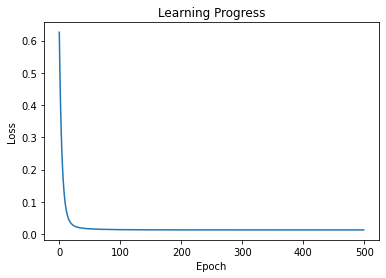

In [10]:
w = np.random.rand(2,)
b = np.random.rand()
lr = 0.0005

learning_progress = []
for epoch in range(500):
  losses = []
  for i in range(len(train_x)):
    x = train_x[i]
    y = train_y[i]
    y_pred = np.dot(x, w) + b
    
    loss = 0.5 * (y_pred - y)**2

    w = w - lr * (y_pred - y) * x
    b = b - lr * (y_pred - y)
    

    losses.append(loss)
  learning_progress.append(np.mean(losses))
  
plt.title("Learning Progress")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(len(learning_progress)), learning_progress)
plt.show()

The resulting prediction can be seen in the figure below. The background color gives the prediction in the corresponding area.

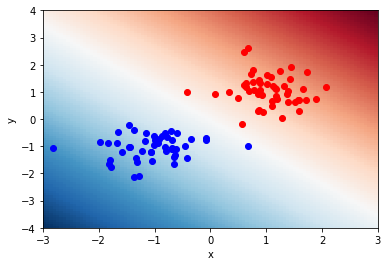

In [11]:
x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-4, 4, 100))
prediction = np.array([[np.dot([x, y], w) + b for x in np.linspace(-1, 1, 100)] for y in np.linspace(-1, 1, 100)])


plt.xlabel("x")
plt.ylabel("y")

plt.pcolor(x,y,prediction.reshape(100, 100), cmap="RdBu")

plt.scatter(data_points_1[:, 0], data_points_1[:, 1], color="red")
plt.scatter(data_points_2[:, 0], data_points_2[:, 1], color="blue")

plt.show()